##**AI-Based Student Engagement Detection System**

---



**Mount Google Drive:** Connect Google Drive so we can access the dataset stored in it.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Set Dataset Paths:**
Tell Colab where the training and testing folders are located in Drive.

In [ ]:
data_dir_train = "/content/drive/MyDrive/Student-engagement-dataset/train"
data_dir_test = "/content/drive/MyDrive/Student-engagement-dataset/test"

**Load Dataset Using ImageDataGenerator:** Load images, normalize them, and create train/validation/test data generators.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Train Data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# Train generator
train_generator = train_datagen.flow_from_directory(
    data_dir_train,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation generator
val_generator = train_datagen.flow_from_directory(
    data_dir_train,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    data_dir_test,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 1699 images belonging to 6 classes.
Found 421 images belonging to 6 classes.
Found 2120 images belonging to 6 classes.


**Check Class Labels:** Display class names to confirm the dataset is correctly organized.

In [6]:
train_generator.class_indices

{'Looking Away': 0,
 'bored': 1,
 'confused': 2,
 'drowsy': 3,
 'engaged': 4,
 'frustrated': 5}

**Build MobileNetV2 Model:** Create the MobileNetV2 model with transfer learning and a custom output layer.

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential

base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

**Train the Model:** Train the model using training and validation data for a fixed number of epochs.

In [8]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 633s 11s/step - accuracy: 0.6410 - loss: 0.9780 - val_accuracy: 0.8741 - val_loss: 0.3714
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 235ms/step - accuracy: 0.9186 - loss: 0.1855 - val_accuracy: 0.8741 - val_loss: 0.3604
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 230ms/step - accuracy: 0.9576 - loss: 0.1149 - val_accuracy: 0.8741 - val_loss: 0.5478
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 228ms/step - accuracy: 0.9523 - loss: 0.1078 - val_accuracy: 0.8741 - val_loss: 0.4571
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 270ms/step - accuracy: 0.9663 - loss: 0.0969 - val_accuracy: 0.8812 - val_loss: 0.3643
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 233ms/step - accuracy: 0.9661 - loss: 0.0831 - val_accuracy: 0.8836 - val_loss: 0.3432
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 230ms/step - accuracy: 0.9704 - loss: 0.0734 - val_accuracy: 0.8789 - val_loss: 0.4337
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 226ms/step - accuracy: 0.9802 - loss: 0.0555 - val_accur

**Plot Accuracy Graph:** Visualize how training and validation accuracy changed over epochs.

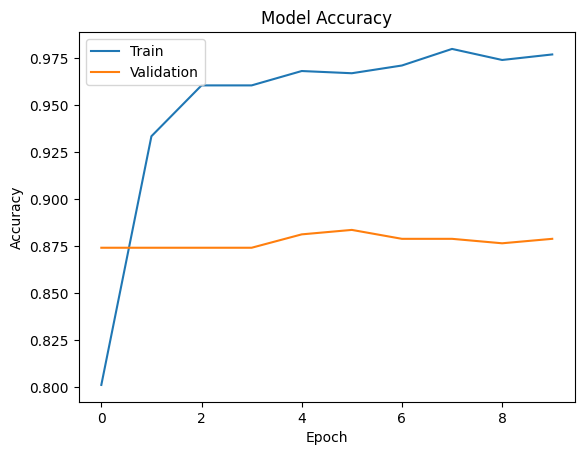

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'])
plt.show()

**Plot Loss Graph:** Visualize how training and validation loss changed during training.

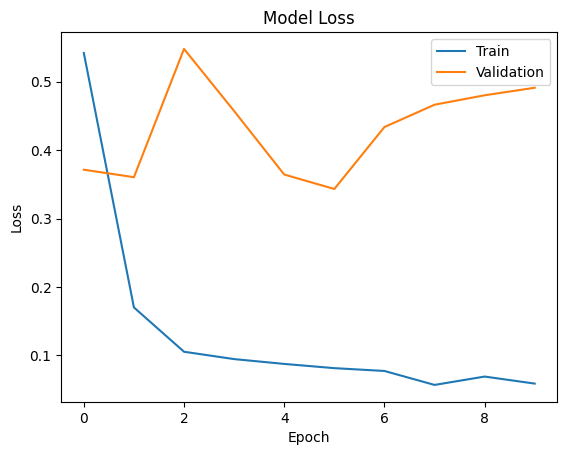

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'])
plt.show()

**Evaluate on Test Data:** Check how well the model performs on completely unseen test images.

In [11]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

67/67 ━━━━━━━━━━━━━━━━━━━━ 506s 8s/step - accuracy: 0.9546 - loss: 0.1610
Test Accuracy: 0.9627358317375183
Test Loss: 0.1324174851179123


**Confusion Matrix & Classification Report:** Show detailed performance for each class using confusion matrix and metrics.

67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 242ms/step


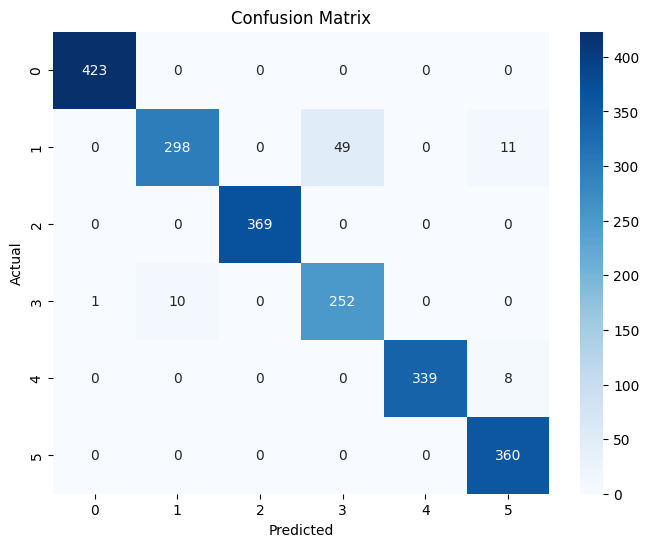

              precision    recall  f1-score   support

Looking Away       1.00      1.00      1.00       423
       bored       0.97      0.83      0.89       358
    confused       1.00      1.00      1.00       369
      drowsy       0.84      0.96      0.89       263
     engaged       1.00      0.98      0.99       347
  frustrated       0.95      1.00      0.97       360

    accuracy                           0.96      2120
   macro avg       0.96      0.96      0.96      2120
weighted avg       0.97      0.96      0.96      2120



In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

**Save the Model**

In [16]:
model.save("/content/drive/MyDrive/student_engagement_mobilenetv2.keras")